| Feature            | Description                                                        | Importance                                                                                                                                                |
| ------------------ | ------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Age**            | Patient’s age in years                                             | Age is a significant risk factor for heart disease. As age increases, the likelihood of heart disease generally increases.                                |
| **Sex**            | Biological sex (1 = male, 0 = female)                              | Males are often at higher risk of heart disease compared to females, especially at younger ages.                                                          |
| **ChestPainType**  | Type of chest pain experienced (0-3 categorical values)            | Different types of chest pain indicate varying likelihood of heart-related issues. For example, typical angina is strongly associated with heart disease. |
| **RestingBP**      | Resting blood pressure (in mm Hg)                                  | Elevated blood pressure is a key indicator of potential cardiovascular problems.                                                                          |
| **Cholesterol**    | Serum cholesterol level (in mg/dl)                                 | High cholesterol levels are directly linked to the development of atherosclerosis and heart disease.                                                      |
| **FastingBS**      | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)              | Elevated fasting blood sugar can indicate diabetes, which is a major risk factor for heart disease.                                                       |
| **RestingECG**     | Results of resting electrocardiogram (0-2 categorical values)      | Abnormal ECG results can reveal heart abnormalities or previous heart events.                                                                             |
| **MaxHR**          | Maximum heart rate achieved during exercise                        | Lower maximum heart rates may indicate reduced cardiac fitness or other cardiac issues.                                                                   |
| **ExerciseAngina** | Exercise-induced angina (1 = yes, 0 = no)                          | Chest pain during exercise is a strong warning sign of coronary artery disease.                                                                           |
| **Oldpeak**        | ST depression induced by exercise relative to rest                 | Indicates the level of stress on the heart; higher values are typically associated with greater risk.                                                     |
| **ST\_Slope**      | The slope of the peak exercise ST segment (0-2 categorical values) | The slope provides additional diagnostic information about heart stress during exercise.                                                                  |
| **Target**         | Heart disease presence (1 = disease, 0 = no disease)               | The target variable the model is attempting to predict.                                                                                                   |


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
heart = pd.read_csv("heart.csv")

In [5]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


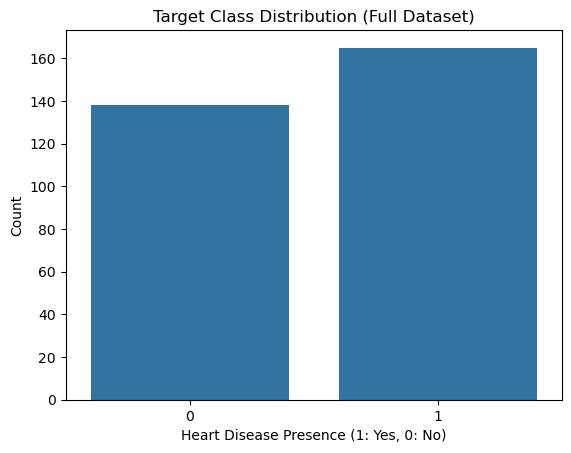

In [16]:
#Target Class Distribution (Full Dataset)

a = heart.iloc[:,:-1]
b = heart.iloc[:,-1]
sns.countplot(x=b)  
plt.title("Target Class Distribution (Full Dataset)")
plt.xlabel("Heart Disease Presence (1: Yes, 0: No)")
plt.ylabel("Count")
plt.show()

In [18]:
# to Check basic information about the dataset
print(heart.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(heart.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Missing Values in Each Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0


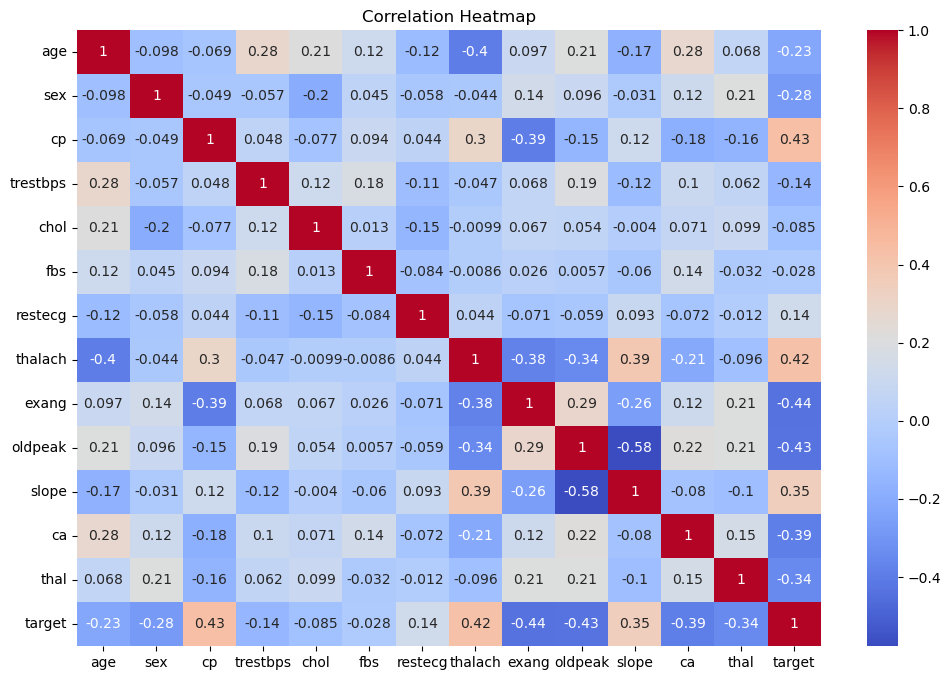

In [20]:
# Plot correlation heatmap to check feature relationships
plt.figure(figsize=(12,8))
sns.heatmap(heart.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

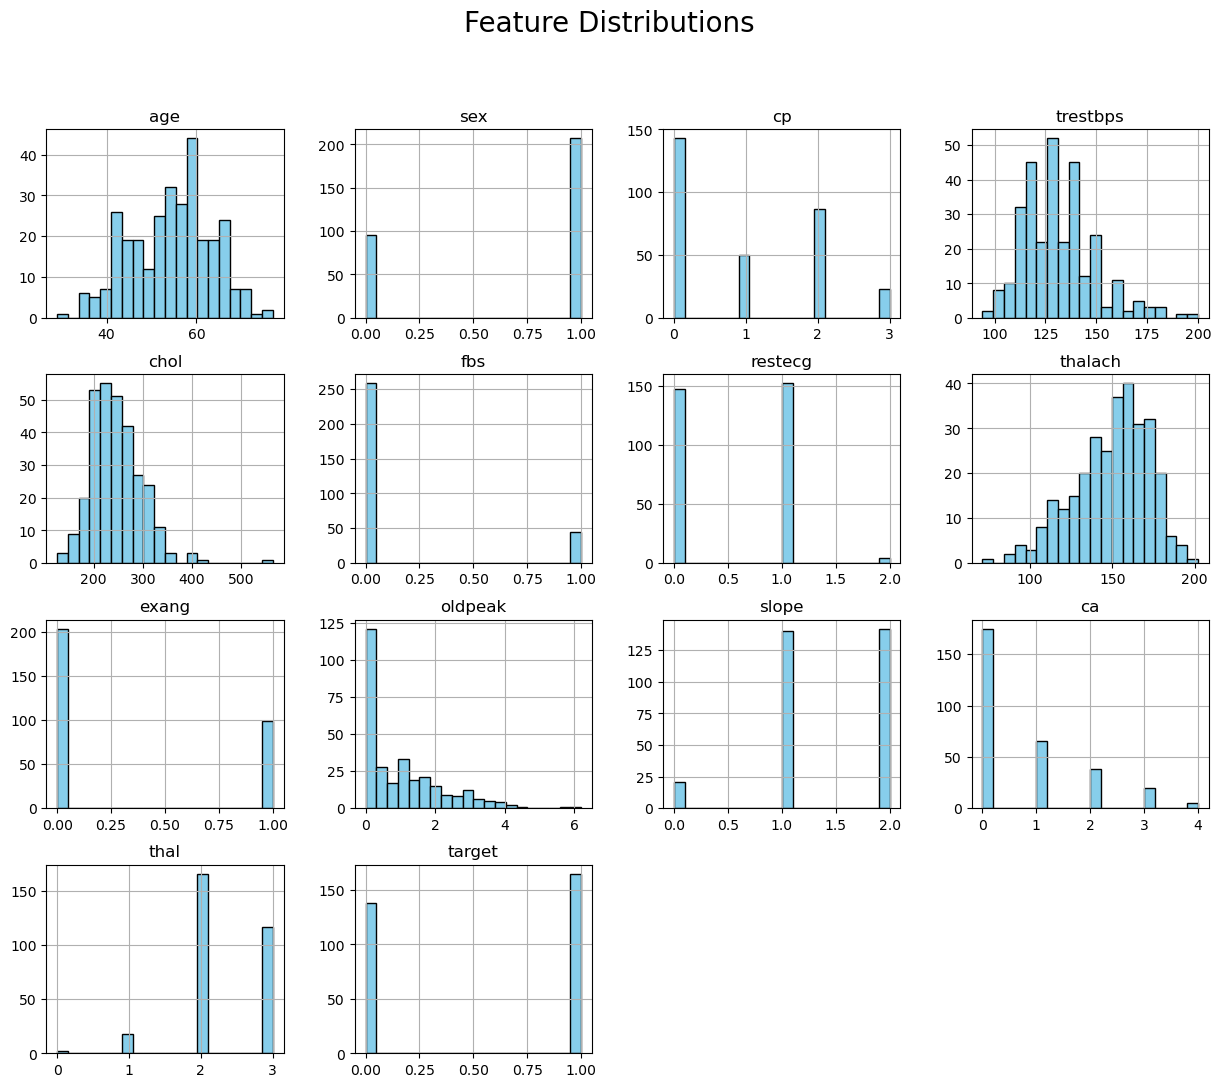

In [22]:
# the distribution of each feature
heart.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=20)
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
kl = MinMaxScaler()

# Select all features (excluding the target)
fg = heart.iloc[:, :-1]

# Apply MinMax scaling to the features
X = kl.fit_transform(fg)

In [26]:
X

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [28]:
#converting array back to dataframe

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [30]:
Y = heart.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)



In [34]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [36]:
#importing gradient boost 

from sklearn.ensemble import GradientBoostingClassifier
fg = GradientBoostingClassifier()



In [38]:
from sklearn.metrics import *

In [40]:
jk = fg.fit(x_train,y_train)

In [42]:
 y_gb = jk.predict(x_test)
y_gb

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [44]:
acc=accuracy_score(y_test,y_gb)
acc

0.7631578947368421

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.03, 0.02, 0.07, 0.06, 0.04, 0.05, 0.1],  # Corrected parameter name
    'max_depth': [5, 6, 7, 8, 9, 10],  # Corrected parameter name
    'n_estimators': [50, 65, 80, 100]
}
# Initialize the Gradient Boosting Classifier
gb = GradientBoostingClassifier()
# Set up GridSearchCV
fhh = GridSearchCV(estimator=gb, scoring='accuracy', param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
# Fit the model
fhh.fit(x_train, y_train)  # Ensure you have defined X_train and y_train
# Get the best parameters
cv_best_params = fhh.best_params_
print(f'Best Parameters: {cv_best_params}')

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}


In [47]:
cv_best_params

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

In [50]:
gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=6, n_estimators=80)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=6, n_estimators=80)

In [52]:
Y_pred1 = gbc.predict(x_test)
Y_pred1

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [54]:
from sklearn.metrics import *

acc = accuracy_score(Y_pred1,y_test)
acc

0.7894736842105263

In [56]:
print(classification_report(y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.82      0.78      0.80        41

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



In [60]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [62]:
import warnings 
warnings.filterwarnings('ignore')

In [64]:
#fitting data to xgboost

from xgboost import XGBClassifier
from sklearn.metrics import *
xgb=XGBClassifier(alpha = 0.1,lambda_=0.1,max_depth=3,n_estimators=50,learning_rate=0.01)
xgb.fit(x_train,y_train)
ygb_pred=xgb.predict(x_test)
ygb_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [66]:
print(classification_report(y_test,ygb_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.80      0.88      0.84        41

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



In [68]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for tuning
param_grid = {
    'gamma': [0, 0.01, 0.02, 0.04],  # Minimum loss reduction to make a split, controls model complexity
    'learning_rate': [0.01, 0.03, 0.06, 0.1],  # How quickly the model adapts (smaller values learn slower but better)
    'max_depth': [5, 6, 7, 8, 9],  # Maximum depth of the trees (controls overfitting)
    'n_estimators': [50, 65, 80],  # Number of boosting rounds (trees)
    'alpha': [0, 0.1, 0.5, 1],  # L1 regularization to control overfitting
    'lambda': [1, 1.5, 2, 3]  # L2 regularization to control overfitting
}

# Initialize the XGBClassifier with random state for reproducibility
xgb = XGBClassifier(random_state=42, eval_metric='logloss')  # eval_metric is logloss (recommended for classification)

# Set up GridSearchCV
# scoring='accuracy' because we are solving a classification problem
# cv=3 means 3-fold cross-validation
# verbose=2 gives detailed logging of training progress
# n_jobs=-1 uses all available CPU cores for faster processing
sk = GridSearchCV(estimator=xgb, scoring='accuracy', param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the Grid Search to the training data
sk.fit(x_train, y_train)

# Get the best hyperparameters found during grid search
cv_best_params = sk.best_params_
print(f'Best Parameters: {cv_best_params}')

# Get the best cross-validation accuracy achieved with these parameters
print(f'Best Cross-Validation Accuracy: {sk.best_score_:.4f}')


Fitting 3 folds for each of 3840 candidates, totalling 11520 fits
Best Parameters: {'alpha': 0.1, 'gamma': 0, 'lambda': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 80}
Best Cross-Validation Accuracy: 0.8151


In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import *

# Initialize the XGBClassifier with selected hyperparameters
xgb2 = XGBClassifier(alpha=0.1, gamma=0.4, lambda_=3, learning_rate=0.03, max_depth=5, n_estimators=80)

# Fit the model to the training data
xgb2.fit(x_train, y_train)

# Make predictions on the test data
ygb2_pred = xgb2.predict(x_test)

# Print predictions
print(ygb2_pred)

[0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1
 0 1]


In [70]:
#accuracy score 

acc = accuracy_score(ygb2_pred,y_test)
acc

0.8289473684210527

In [74]:
#classification report

print(classification_report(y_test,ygb2_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.83      0.85      0.84        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [78]:
# Confusion Matrix
cm = confusion_matrix(y_test, ygb2_pred)
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[28  7]
 [ 6 35]]


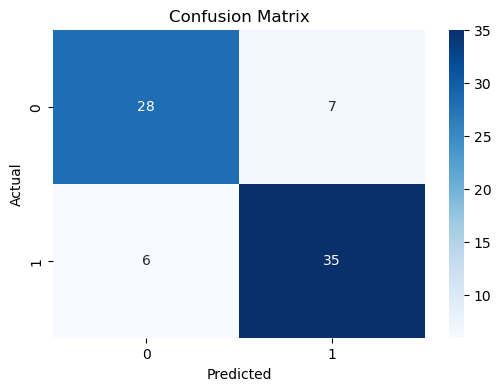

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()